In [ ]:
### till now 

### 1:30 mins !

### Dataset : https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## dataset(uber-raw-data-janjune-15.csv) is about 500+mb ,
# takes around 2 mins
uber_15 = pd.read_csv(r'G:\Data Science projects\by_other\uber-pickups-in-new-york-city\Datasets/uber-raw-data-janjune-15.csv',encoding='utf-8')
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [3]:
uber_15.shape

(14270479, 4)

In [4]:
uber_15.duplicated().sum()

### be-default , keep='first'
## uber_15.duplicated(keep='first').sum()

##  It means that the method will consider the first 
## instance of a row to be unique and the 
## remaining instances to be duplicates.

898225

In [6]:
uber_15[uber_15.duplicated(keep='first')]

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
17,B02617,2015-05-17 09:49:00,B02617,237
70,B02617,2015-05-17 09:59:00,B02617,48
77,B02617,2015-05-17 10:00:00,B02617,141
85,B02617,2015-05-17 10:02:00,B02617,237
105,B02617,2015-05-17 10:05:00,B02617,79
...,...,...,...,...
14270310,B02764,2015-05-12 18:15:00,B02764,161
14270360,B02765,2015-05-08 15:23:00,B02765,141
14270418,B02765,2015-05-08 15:34:00,B02765,243
14270428,B02765,2015-05-08 15:35:00,B02765,90


In [12]:
### uber_15[(uber_15['Dispatching_base_num']=='B02617') & (uber_15['Pickup_date']=='2015-05-17 09:49:00') & (uber_15['Affiliated_base_num']=='B02617') & (uber_15['locationID']==237)]             

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
14,B02617,2015-05-17 09:49:00,B02617,237
17,B02617,2015-05-17 09:49:00,B02617,237


# 1.. Which month have max. Uber pickups in NYC?

In [13]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [ ]:
### date-type of 'Pickup-date' must be 'Date-time' bcz it 
holds date-time values..

'''
in date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])
datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,
 ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..
'''

In [14]:
#Checking the minimum date in the uber_15 , ie from 
# which date our pickups are started !
uber_15['Pickup_date'].min()

'2015-01-01 00:00:05'

In [15]:
#Checking the maximum date in the uber_15 , ie 
# to which date we have uber data !
uber_15['Pickup_date'].max()

'2015-06-30 23:59:00'

In [16]:
## from this ''2015-06-30 23:59:00'' , lets consider format !
uber_15['Pickup_date'] =  pd.to_datetime(\
     uber_15['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [17]:
uber_15['month']=uber_15['Pickup_date'].dt.month

In [18]:
uber_15['month'].value_counts()

6    2816895
5    2695553
4    2280837
2    2263620
3    2259773
1    1953801
Name: month, dtype: int64

<AxesSubplot:>

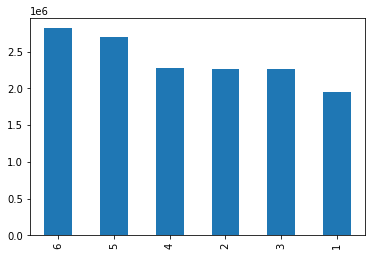

In [19]:
uber_15['month'].value_counts().plot(kind='bar')

In [ ]:
'''

Pandas is one of the the most preferred and widely used tools in Python for data analysis. 
It also has it’s own simple build-in plot function. But when it comes to interactive visualization, 
Pandas users face some difficulties as they dont havet front-end engineer skills like javacript since lots of library 
such as D3,chart.js requires some javascript background.
This is where that Plotly and Cufflinks come handy.


'''



# 2.. Total trips by month & weekdays !  


    Here we can use grouped bar chart !
     Ie , we need data like this !

     month    weekday       count
        1      Friday       88985
        1      Monday       60075
        1      Saturday     76152
        
        
        2      Monday        32K
        2      Tuesday       12k
        2      wednesday     11k
        

In [21]:
uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['minute']=uber_15['Pickup_date'].dt.minute
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['hour']=uber_15['Pickup_date'].dt.hour

In [28]:
temp=uber_15.groupby(['month','weekday'],as_index=False).size()

In [29]:
temp.head(3)

,month,weekday,size
0,1,Friday,345532
1,1,Monday,194004
2,1,Saturday,392900


In [30]:
temp['month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [31]:
dict_month={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June'}
temp['month']=temp['month'].map(dict_month)

In [32]:
temp.head(3)

,month,weekday,size
0,Jan,Friday,345532
1,Jan,Monday,194004
2,Jan,Saturday,392900


<AxesSubplot:xlabel='month', ylabel='size'>

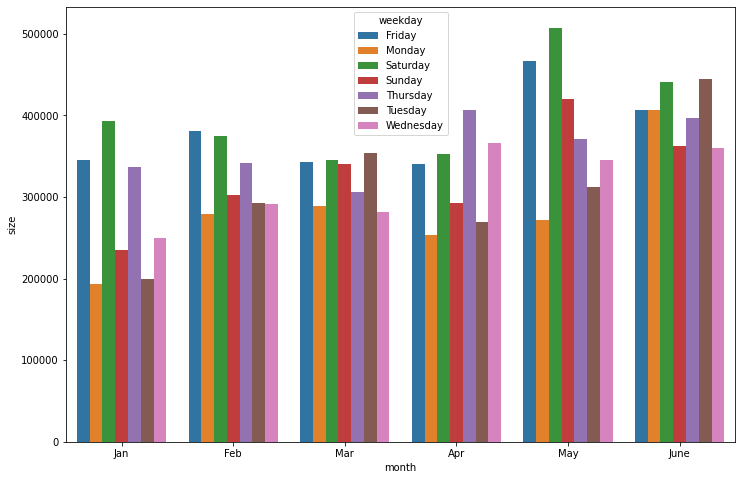

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x='month',y='size',hue='weekday',data=temp)

In [ ]:
### not possible via pandas too !
### temp2.plot(stacked=True)

### as it is designed for only stacked bar chart !

In [ ]:
### not possible using cufflinks & plotly !
### bcz in iplot , we have a parameter as barmode ==>>  temp2.iplot(barmode='')

## but we can generate only 'stacked bar chart' by setting temp2.iplot(barmode='stacked', x=  , y=   )

In [ ]:
### another way to do this :

In [ ]:
### https://www.kaggle.com/alaasedeeq/data-exploration-and-visualization-uber-data

# 3.. Hourly Rush in New york city on all days   
       7th prblem statement is also same ,diff is here we have datafrme ,over there we will convert our dataframe into pivot

In [36]:
summary=uber_15.groupby(['weekday', 'hour'],as_index=False).\
                                size()

In [37]:
summary

,weekday,hour,size
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575
...,...,...,...
163,Wednesday,19,143751
164,Wednesday,20,136003
165,Wednesday,21,133993
166,Wednesday,22,127026


<AxesSubplot:xlabel='hour', ylabel='size'>

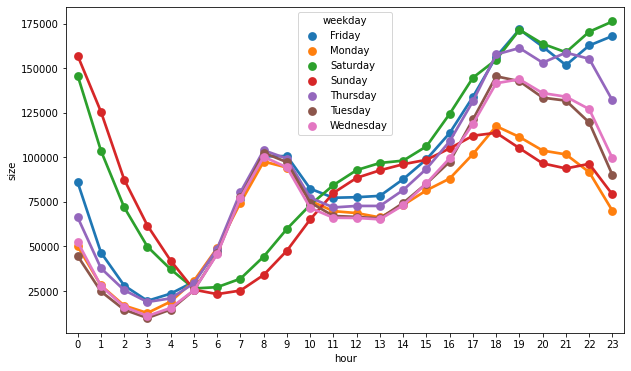

In [47]:
plt.figure(figsize=(10,6))
sns.pointplot(x="hour", y="size", hue="weekday", data=summary)


### sns.lineplot(x='weekday',y='size',hue='hour') -- 
### lineplot of seaborn doesnt work bcz lineplot of seaborn 
### doesnt work with string type of values..

In [ ]:
'''
It's interesting to see that Saturday and Sunday exhibit 
similar demand throughout the late night/morning/afternoon, 
but it exhibits opposite trends during the evening. In the evening, 
Saturday pickups continue to increase throughout the evening,
but Sunday pickups takes a downward turn after evening..

We can see that there the weekdays that has the most demand 
during the late evening is Friday and Saturday, 
which is expected, but what strikes me is that Thursday nights 
also exhibits very similar trends as Friday and Saturday nights.

It seems like New Yorkers are starting their 'weekends' on Thursday nights. :)


'''

# 4.. Which Base_number has most numer of Active Vehicles ??   

#### ways to do it--
    1.. using histogram (distribution)
    2.. using boxplot
    3.. using violinplot

In [50]:
## read Uber-jan-Feb-Foil.csv
uber_foil=pd.read_csv(r'G:\Data Science projects\by_other\uber-pickups-in-new-york-city\Datasets/Uber-Jan-Feb-FOIL.csv')

In [51]:
uber_foil.head(2)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765


In [98]:
## just establish entire setup of plotly in-case u are not getting your visuals !
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, \
                init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [58]:
## px.box(x = 'dispatching_base_number', y = \
##       'active_vehicles', data_frame = uber_foil)

In [ ]:
### so it is pretty much clear that 'B02764' is a clear winner !

In [59]:
plt.figure(figsize=(10,6))
# px.violin(x = 'dispatching_base_number', \
 # y = 'active_vehicles', data_frame = uber_foil)

### if u need distribution +  5-summary stats of data , 
# its good to go with violinplot

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

# 5.. now lets store entire data & remove duplicate values:

In [60]:
import os

In [61]:
files=os.listdir(r'G:\Data Science projects\by_other\uber-pickups-in-new-york-city\Datasets')[4:11]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [62]:
files.remove('uber-raw-data-janjune-15.csv')

In [63]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [64]:
## takes 2 mins !
path=r'G:\Data Science projects\by_other\uber-pickups-in-new-york-city\Datasets'

#blank dataframe
final=pd.DataFrame()

for file in files:
    current_df=pd.read_csv(path+"/"+file,encoding='utf-8')
    final=pd.concat([current_df,final])

In [67]:
final.head(1)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512


### The dataset contains information about the Datetime, Latitude, Longitude and Base of each uber ride that happened in the month of July 2014 at New York City, USA
    Date/Time : The date and time of the Uber pickup
    Lat : The latitude of the Uber pickup
    Lon : The longitude of the Uber pickup
    Base : The TLC base company code affiliated with the Uber pickup
    
    The Base codes are for the following Uber bases:
        B02512 : Unter
        B02598 : Hinter
        B02617 : Weiter
        B02682 : Schmecken
        B02764 : Danach-NY
        
    ->> The globe is split into an imaginary 360 sections from both top to bottom (north to south) and 180 sections from 
    side to side (west to east). The sections running from top to bottom on a globe are called longitude, and the 
    sections running from side to side on a globe are called latitude.
    
    ->> Latitude is the measurement of distance north or south of the Equator.
    
    ->> Every location on earth has a global address. Because the address is in numbers, people can communicate about 
    location no matter what language they might speak. A global address is given as two numbers called coordinates. 
    The two numbers are a location's latitude number and its longitude number ("Lat/Long").

In [65]:
final.shape

(4534327, 4)

In [ ]:
### After Collecting entire data ,u might ask is : Do we have duplicate entires in data ?
### We are going to remove duplicates data when the entire rows is duplicated

In [66]:
### first lets figure out total observations where we have duplicate values..
final.duplicated().sum()

82581

In [69]:
### By default, it removes duplicate rows based on all columns.
### To remove duplicates on specific column(s), use subset.

### by-default , keep='first which says it will keep first occurence of duplicates...'

final.drop_duplicates(inplace=True)

In [70]:
final.shape

(4451746, 4)

In [ ]:
### takes 5 mins
# final.to_csv(r'G:\Data Science projects\by_other\uber-pickups-in-new-york-city\Updated_data/uber_data.csv',index=False)

## ways to export data :
### follow Zomato_data_collection_preparation( 1 )_data_engineering to learn more about Exporting ways :
    We have around more than 20 ways to store this data , but lets discuss more ferquent used ways that data enginners or 
    ML/Data Scientist used in day-2-day life.


    1..csv (comma separated values) or tsv(tab separated values)
        when the number of observations in your dataset is high, the process of saving the data and loading data back into 
        the memory becomes slower,& here csv & tsv lose their effectiveness..

    2..Json(Javascript obj notation)
        Extensively used format in Industries in the context of web to send data from one web server to another web server,
        in json , we represent our data in the form of key-value pairs..

        b)messagepack(similar to json but it is fast & small)
          ->> there is no such in-built like df.to_msgpack() to do this 
          ->> but ya we have this function in the previous release of pandas library probably till 0.25


    3..Database (sql database )-- Use the sqlite3 module to interact with a SQL database.
            Storing your data in an SQLite database can provide substantial performance improvements when reading/writing 
            compared to CSV.The difference in performance becomes more noticeable as the size of the dataset grows..

    4..HDF5 ,(Hierachical Data File)-->> a file format designed to store & organize large ammount of data 
    5..feather--a fast, lightweight, and easy-to-use binary file format for storing data frames
    6..parquet--an Apache Hadoop’s storage format

### must watch-->> https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d

### different formats--
    There are plenty of binary formats to store the data on disk, and many of them pandas supports
    Lets talk which one is better in terms of I/O speed, consumed memory and disk space
    Formats to Compare
    We’re going to consider the following formats to store our data.

    Plain-text CSV — a good old friend of a data scientist
    MessagePack — it’s like JSON but fast and small
    HDF5 —a file format designed to store and organize large amounts of data
    Feather — a fast, lightweight, and easy-to-use binary file format for storing data frames
    Parquet — an Apache Hadoop’s columnar storage format

### Chosen Metrics
    I chose the following metrics for comparison.

    size_mb — the size of the file (in Mb) with the serialized data frame
    save_time — an amount of time required to save a data frame onto a disk
    load_time — an amount of time needed to load the previously dumped data frame into memory
    Write time- time needed to write to exisiting files
    save_ram_delta_mb — the maximal memory consumption growth during a data frame saving process
    load_ram_delta_mb — the maximal memory consumption growth during a data frame loading process

    Note that the last two metrics become very important when we use the efficiently compressed binary data formats, like Parquet.

### hierarchy or order
    csv>hdf>msgpack>parquet>feather-->> saving time to save dataframe..
    hdf>csv>msgpack>featherparquet-->> loading time to load dataframe
    
    Write time-->> excel>csv>parquet>hdf5>pickle


    hdf>csv>feather>msgpack>parquet-->> size_mb

    csv>hdf>msgpack>parquetfeather-->> save_ram_delta_mb(memory consumption for dataframe to save)
    hdf>parquet>feather>msgpack>csv-->> load_ram_delta_mb(memory consumption for dataframe to load)
    
    Feather has max I/O speed

### Conclusion-->>
    it seems that feather format is an ideal candidate to store the data between Jupyter sessions. It shows high I/O speed, doesn’t take too much memory on the disk and doesn’t need any unpacking when loaded back into RAM.

#### a..Store your data into csv..

In [ ]:
### takes around 6 mins
## df.to_csv(r'G:\Data Science projects\EDA_Projects\zomato-bangalore-restaurants\Data_enginnering/updated_zomato.csv',index=False)

#### b.. store your data into json file..

In [ ]:
df[0:100].to_json('G:\Data Science projects\EDA_Projects\zomato-bangalore-restaurants\Data_enginnering/file.json')

#### c...Storing data into database

In [ ]:
### define connection for sqlite..
## Use the sqlite3 module to interact with a SQL database.

#create sqlalchemy engine by using create_engine method
## Format of connection string is:
## for other databases,we have diff diff formats for oracle,postgresql

from sqlalchemy import create_engine
engine = create_engine('sqlite:///zomato.sqlite')

#Now use df.to_sql to convert it into sql


### we will store first 100 rows into Users table..

#syntax=df.to_sql(
    #name='name of table'
    #con=sql engine
    #if_exists=if u have a table,that has some records,then u can append ur df values into that table 
                #('fail','replace','append')
    #index=if we dont want our df index to our sql,we put as false
#)


df[0:100].to_sql('Users', con=engine,if_exists='append')



### do not execute this cell multiple times , otherwise it will give u OPerational error(when if_exists='replace') 
### & value-error(if_exists='append')

In [ ]:
#If we want to load huge amount of data into batches,we can use chunksize parameter,by default it is None
#Syntax is = pd.read_sql(query,engine,chunksize=None,parse_dates=None)

#### d..Store data in HDF5(Hierachical Data File)
    The HDF5 is a standard for storing multi-dimensional data in a hierarchical fashion. A HDF5 dataset can have up to 32 dimensions.

In [ ]:
## method to_hdf() exports a pandas DataFrame object to a HDF5 File.
## to_hdf() method internally uses the pytables library to store the DataFrame into a HDF5 file.

## df.to_hdf() expects a string as a key parameter (second parameter):


df[0:100].to_hdf(r'G:\Data Science projects\EDA_Projects\zomato-bangalore-restaurants\Data_enginnering/zomato1.h5',key='df.name')



## read_hdf() method reads a pandas object like DataFrame, Series from a HDF5 file.

#### e..Store data in Feather(a fast, lightweight, and easy-to-use binary file format for storing data frames¶

In [ ]:
## !pip install pyarrow

In [ ]:
### u have to mention pyarrow
## pandas.to_feather and read_feather are both based on pyarrow,so u have to install pyarrow first using pip or conda
## otherwise u will get ImportErrror..

df[0:100].to_feather(r'C:\Users\mcr\Data_Analytics_Projects\Zomato\Data_enginnering/file.ftr')

#### f..Store data in Parquet(Apache Hadoop Storage format)
    One of the main advantages of Parquet is its storage efficiency.

In [ ]:
### !pip install fastparquet
## 0.7.1

In [ ]:
### use engine-->> 'pyarrow', or 'fastparquet'.
### If you have more than one parquet library installed ie (pyarrow  or fastparquet),
### you also need to specify which engine you want pandas to use

## df[0:100].to_parquet(r'G:\Data Science projects\EDA_Projects\zomato-bangalore-restaurants\Data_enginnering/myfile.parquet',engine='fastparquet')

### ways of compressing parquett files->> 
    Q..Why to compress it>>
    Ans-- To provide better storage efficiency..
    
    parquet files can be further compressed while writing. 
    Following are the popular compression formats.

    >> Snappy ( default, requires no argument)
    >> gzip-->> compression='GZIP'
    >> brotli-->> compression='BROTLI'
    
    Storage size comparison-->> [ parquet(brotli>>parquet(gzip)>>parquet(snappy)>>parquet(none]
    
### Follow for detail-->> https://tech.blueyonder.com/efficient-dataframe-storage-with-apache-parquet/

In [ ]:
df[0:100].to_parquet(r'G:\Data Science projects\EDA_Projects\zomato-bangalore-restaurants\Data_enginnering/df.parquet.gzip', compression='gzip')

# 6.. at what location we are getting rush ?? 

### ways to do it --
    1.. Use pointplot (not that much efficient)
    2.. using matplotlib simple density plot 
    3.. use folium Heatmaps

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(final['Lon'], final['Lat'],'r+', ms=0.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6,41)
### plot y using x with red plusses:
### ms is all about markersize


### think for bokeh as well..(second last example of below link)
### https://docs.bokeh.org/en/latest/docs/user_guide/geo.html

We can see a number of hot spots here. Midtown Manhattan is clearly a huge bright spot.
& these are made from Midtown to Lower Manhattan.
Followed by Upper Manhattan and the Heights of Brooklyn.

In [ ]:
### this plot is little bit hard to visualise ,bcz someone who doesnt have good knowledge of geogeophy cant understand it,
## so lets make it more straight-forward.

In [74]:
rush_uber=final.groupby(['Lat','Lon'],as_index=False).size()
rush_uber

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
...,...,...,...
574553,41.3730,-72.9237,1
574554,41.3737,-73.7988,1
574555,41.5016,-72.8987,1
574556,41.5276,-72.7734,1


In [75]:
import folium
basemap=folium.Map()

In [76]:
from folium.plugins import HeatMap
HeatMap(rush_uber.values.tolist(),zoom=20,radius=15).add_to(basemap)

In [ ]:
## basemap

In [ ]:
We can see a number of hot spots here. Midtown Manhattan is clearly a huge bright spot.
& these are made from Midtown to Lower Manhattan.
Followed by Upper Manhattan and the Heights of Brooklyn.

In [ ]:
### Similarly , we can perform Spatial Analysis using heatmap to get a clear cut of Rush on weekends !

# 7.. Heatmap of Hour and Weekday to understand on which pair of (hour,weekday) , we have rush ! 
    


In [ ]:
### date-type of Date/Time must be 'Date-time' bcz it holds date-time values..

'''
in date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])
datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..
'''

In [79]:
final['Date/Time'] = pd.to_datetime(final['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [ ]:
## now lets fetch weekday ,day ,minute ,month ,hour from 'Date/Time' feature !

In [82]:
final['weekday']=final['Date/Time'].dt.day
final['hour']=final['Date/Time'].dt.hour

In [83]:
final.groupby(['weekday','hour'])['hour'].count() 

weekday  hour
1        0       3178
         1       1944
         2       1256
         3       1308
         4       1429
                 ... 
31       19      4898
         20      4819
         21      5064
         22      5164
         23      3961
Name: hour, Length: 744, dtype: int64

In [85]:
cross=final.groupby(['weekday','hour'])['hour'].count() 

In [86]:
type(cross)

pandas.core.series.Series

In [ ]:
### lets convert this series into a pivot table !
### pivot table is all about  , we have Rows*columns & having value in each cell !

In [87]:
pivot=cross.unstack()
pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,...,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,...,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,...,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,...,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,...,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,...,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,...,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,...,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,...,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [88]:
### a) by styling dataframe (Create Heatmap within dataframe)
pivot.style.background_gradient()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


<AxesSubplot:xlabel='hour', ylabel='weekday'>

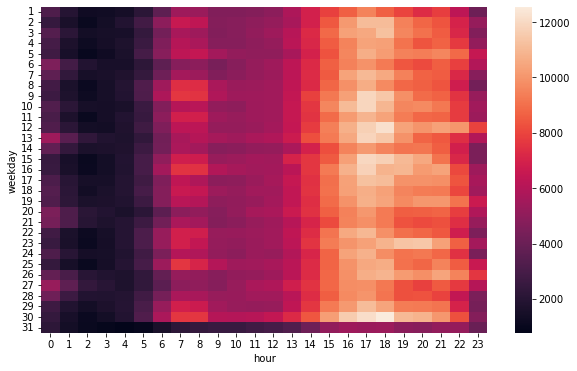

In [90]:
### b) by creating Heatmap of pivot table (Dataframe) using Seaborn..
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=False)

# 8.. How to Automate Your Analysis..


In [95]:
def heatmap(df,col1,col2):
    by_cross = df.groupby([col1,col2])['hour'].count()
    pivot=by_cross.unstack()
    return pivot.style.background_gradient()

'''
### less code
def heatmap(col1,col2):
    plt.figure(figsize=(10,6))
    return sns.heatmap(df.groupby([col1,col2]).apply(lambda x:len(x)).unstack())
    

'''

'\n### less code\ndef heatmap(col1,col2):\n    plt.figure(figsize=(10,6))\n    return sns.heatmap(df.groupby([col1,col2]).apply(lambda x:len(x)).unstack())\n    \n\n'

In [96]:
## validating above Analysis through Heatmap
heatmap(final,'weekday','hour')

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


<Figure size 720x432 with 0 Axes>